### Polynomial Regression, SVR, Decision Tree, & Random Forest.
1. All of them for non-linear problem.
2. Polynomial is non-linear and continuous regressor.
3. SVR, Decision Tree, and Random Forest are non-linear and non-continuous regressors.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = pd.read_csv ('Analysis of Excretions.csv')
dataset.head(3)

,Label,Sex,Group,Housing,Day1,D1Category,Day2,D2Category,Day3,D3Category,Total,TotalCategory
0,10A1,Male,P,(+Male+Cover),10,med,6,med,2,low,18,high
1,10B1,Male,P,(+Male+Cover),11,high,0,low,8,med,19,high
2,6A1,Male,P,(+Male+Cover),0,low,0,low,0,low,0,low


In [11]:
# Encoding the categorical variables
dataset = pd.get_dummies(dataset, columns= ["Sex","Group","Housing"], prefix= ["Sex","Group","Housing"])
dataset.head(3)

,Label,Day1,D1Category,Day2,D2Category,Day3,D3Category,Total,TotalCategory,Sex_Female,Sex_Male,Group_P,Group_S,Housing_(+Male+Cover),Housing_(+Male-Cover),Housing_(-Male+Cover),Housing_(-Male-Cover)
0,10A1,10,med,6,med,2,low,18,high,0,1,1,0,1,0,0,0
1,10B1,11,high,0,low,8,med,19,high,0,1,1,0,1,0,0,0
2,6A1,0,low,0,low,0,low,0,low,0,1,1,0,1,0,0,0


In [61]:
# creating matrix of features to identify the dependent factor vs independent factors (parameters)
# Avoid the dummy variable trap is done by dropping 1 dummy variable from each category. Some libraries do it for you 
X = dataset.iloc[:, 1:2].values  
y = dataset.iloc[:, 3:4].values 

In [ ]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)""" # you can ommit random_state. It 
# keeps the same random sample for all sampling trials OR you can choose different value.

In [ ]:
# Feature Scaling. This for bringing large and small values of different parameters on the same scale.
# No need for feature scaling as linear regression library will do it for us

In [62]:
# Fitting classifier to the Training set & Predicting the Test set results
# Fitting Multi-Linear Regression to the Training set. Creating the regression class (classifier)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures (degree = 4)
X_poly = poly_reg.fit_transform (X)

regressor2 = LinearRegression()
regressor2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

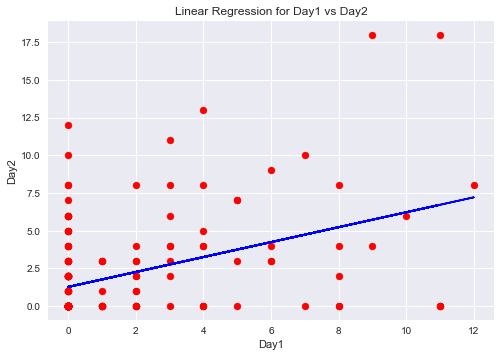

In [64]:
# Visualizing the Linear Regression results
plt.scatter (X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Linear Regression for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

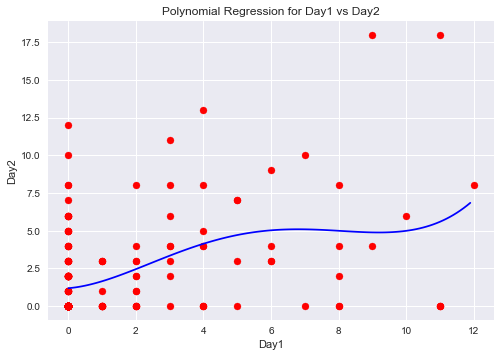

In [65]:
# Visualizing the Polynomial Regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter (X, y, color = 'red')
plt.plot(X_grid, regressor2.predict(poly_reg.fit_transform (X_grid)), color = 'blue')
plt.title('Polynomial Regression for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

In [70]:
# Predicting a new result with Linear Regression and compare it to Polynomial Regression
print (regressor.predict(5))
print (regressor.predict(6))
print (regressor.predict(7))
print (regressor.predict(8))
print (regressor.predict(9))
print (regressor.predict(10))
print (regressor.predict(11))
print (regressor.predict(12))


[[ 3.74398534]]
[[ 4.23873198]]
[[ 4.73347862]]
[[ 5.22822526]]
[[ 5.7229719]]
[[ 6.21771854]]
[[ 6.71246518]]
[[ 7.20721182]]


In [71]:
# Predicting a new result with Polynomial Regression and compare it to Linear Regression
print (regressor2.predict(poly_reg.fit_transform(5)))
print (regressor2.predict(poly_reg.fit_transform(6)))
print (regressor2.predict(poly_reg.fit_transform(7)))
print (regressor2.predict(poly_reg.fit_transform(8)))
print (regressor2.predict(poly_reg.fit_transform(9)))
print (regressor2.predict(poly_reg.fit_transform(10)))
print (regressor2.predict(poly_reg.fit_transform(11)))
print (regressor2.predict(poly_reg.fit_transform(12)))

[[ 4.708241]]
[[ 5.02106641]]
[[ 5.08666014]]
[[ 4.98993754]]
[[ 4.88322295]]
[[ 4.98624973]]
[[ 5.58616021]]
[[ 7.03750571]]


# Support Vector Regression (SVR)

In [73]:
from sklearn.svm import SVR
regressor_svr = SVR (kernel = 'rbf') # we chose 'rbf' because the data could be not linear
regressor_svr.fit(X, y)

C:\Users\omar_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
# Feature Scaling. This for bringing large and small values of different parameters on the same scale.
""" a) No need to feature scale the y (dependent) variable in binary outcome (logistic regression).Do it when the outcome is
continuous (linear regression).

b) There are 2 feature scaling methods, Standardization and Normalization.
Xstand = X - mean(X) / standard deviation(X)
Xnorm = X - min(X) / max(X) - min(X)

c) Even thought most python and R ML libraries do features scaling for you, some are not and then it is required to do it
manually. It is good practice to include feature scaling code in your script to remind youself this important processing step

d) Important note: feature scaling to dummy independent variables improve the model but loss the interpretation. Whereas, you
should not feature scale the dummy dependant variable

e) Some ML model libraries do not have Feature Scaling and then you need to do it manually
eg. SVR class has no Feature Scaling. This may be it is not common class"""
 
# Here we will use Standardisation Scale.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X) # X needs for fit and transform

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

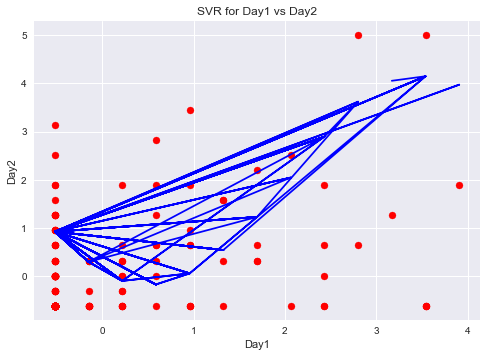

In [89]:
# Visualizing Support Vector Regression results
plt.scatter (X, y, color = 'red')
plt.plot(X, regressor_svr.predict(X), color = 'blue')
plt.title('SVR for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

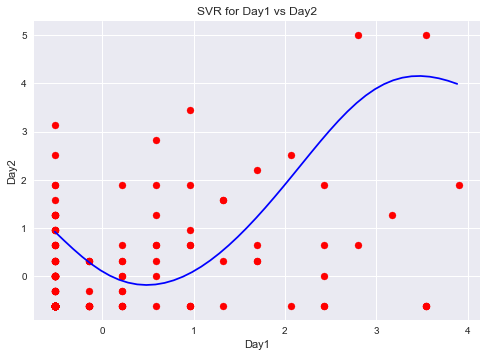

In [92]:
# Visualizing Support Vector Regression results (for higher resolution & smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter (X, y, color = 'red')
plt.plot(X_grid, regressor_svr.predict (X_grid), color = 'blue')
plt.title('SVR for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

In [95]:
# Predicting a new result with Linear Regression and compare it to Polynomial Regression
y_predict_svr = sc_y.inverse_transform (regressor_svr.predict(sc_X.transform(np.array([[5]])))) # use only .transfor without fit as it is already fitted
# use np.array([[5]])) to converst it into array and prevent error message
# use sc_y.inverse_transform to reconvert the featured scaled data back into its original values

y_predict_svr

C:\Users\omar_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([ 3.09964589])

### Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state =0)
regressor_dt.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

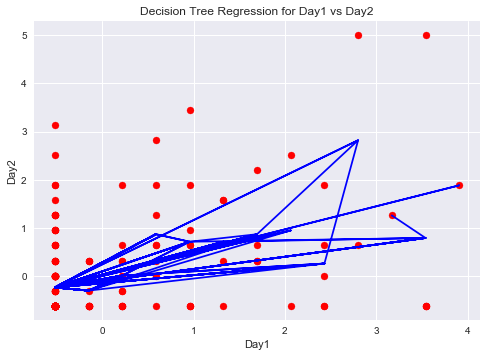

In [100]:
# Visualizing Decision Tree Regression results
plt.scatter (X, y, color = 'red')
plt.plot(X, regressor_dt.predict(X), color = 'blue')
plt.title('Decision Tree Regression for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

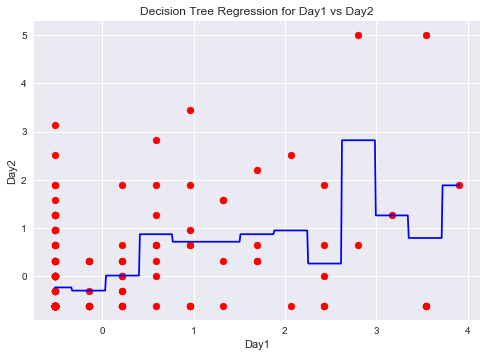

In [102]:
# Visualizing Decision Tree Regression results (for higher resolution which shows the non-continuous points)
X_grid = np.arange(min(X), max(X), 0.01) # change 0.1 to 0.01 to increase the resolution through decreasing the steps
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter (X, y, color = 'red')
plt.plot(X_grid, regressor_dt.predict (X_grid), color = 'blue')
plt.title('Decision Tree Regression for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

In [110]:
regressor_dt.predict(3)

array([ 1.25994856])

### Random Forest Regression

In [105]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf.fit(X, y)

C:\Users\omar_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

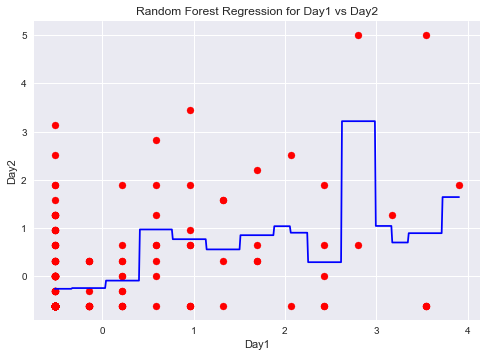

In [106]:
# Visualizing Random Forest Regression results (for higher resolution which shows the non-continuous points)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter (X, y, color = 'red')
plt.plot(X_grid, regressor_rf.predict (X_grid), color = 'blue')
plt.title('Random Forest Regression for Day1 vs Day2')
plt.xlabel('Day1')
plt.ylabel('Day2')
plt.show()

In [107]:
regressor_rf.predict(5)

array([ 1.64079738])

### End of Non-Linear Regression Models. Thank you